In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from lifelines.plotting import plot_lifetimes # Lifeline package for the Survival Analysis

# Used Telecom Customer Churn data from Kaggle

https://www.kaggle.com/blastchar/telco-customer-churn/

In [2]:
##  create a dataframe
df = pd.read_csv(r"C:\Users\Sekhar\Desktop\Datasets\archive\Telco-Customer-Churn.csv") ##provide the filepath in the location address

In [3]:
df.head() ## Have a first look at the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Pre-Processing 

In [4]:
df.info() ## Data Types and Missing Values in Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce') ## Convert TotalCharges to numeric

df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 ) ## Replace yes/No in the Churn column to 1/0. 1 for the event and 0 for the censured data.

In [6]:
df.info()  ## Column TotalCharges is having missing values after converting to numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(3), obj

In [7]:
df.isnull().sum(axis=0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

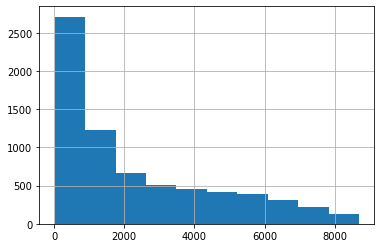

In [8]:
df.TotalCharges.hist()

In [9]:
## Impute the null value with the median value as data is skewed
df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True) 

In [10]:
## Create a list of Categorical Columns
cat_cols= [i  for i in df.columns if df[i].dtype==object]
cat_cols.remove('customerID')  ## customerID has been removed because it is unique for all the rows.

In [11]:
cat_cols #List of categorical columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

## Exploratory Data Analysis

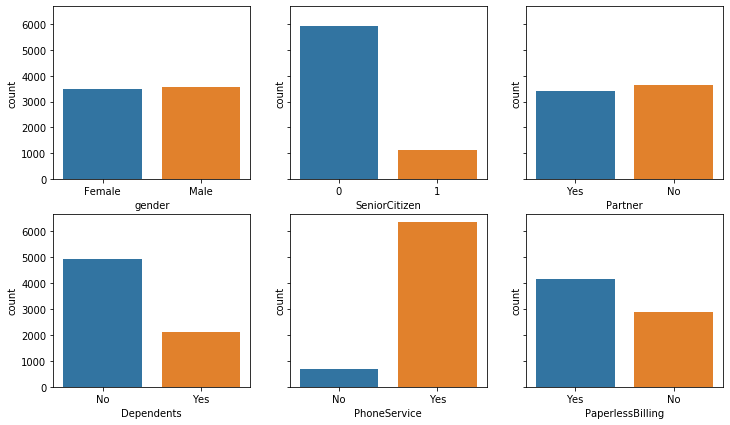

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sb.countplot("gender", data=df, ax=axes[0,0])
sb.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sb.countplot("Partner", data=df, ax=axes[0,2])
sb.countplot("Dependents", data=df, ax=axes[1,0])
sb.countplot("PhoneService", data=df, ax=axes[1,1])
sb.countplot("PaperlessBilling", data=df, ax=axes[1,2])

###### There is a high imbalance in SeniorCitizen and PhoneService variables. Most of the customers are not senior and similarly, most customers have a phone service.

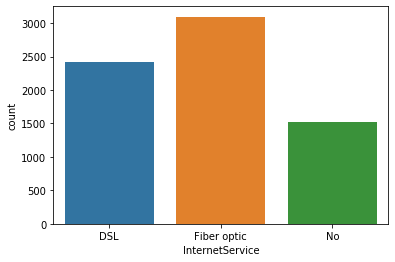

In [13]:
sb.countplot("InternetService", data=df)
#customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic

###### Internet service variable is definitely important in predicting churn rate. As showcased, customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic. This company may have some problems with fiber optic connection

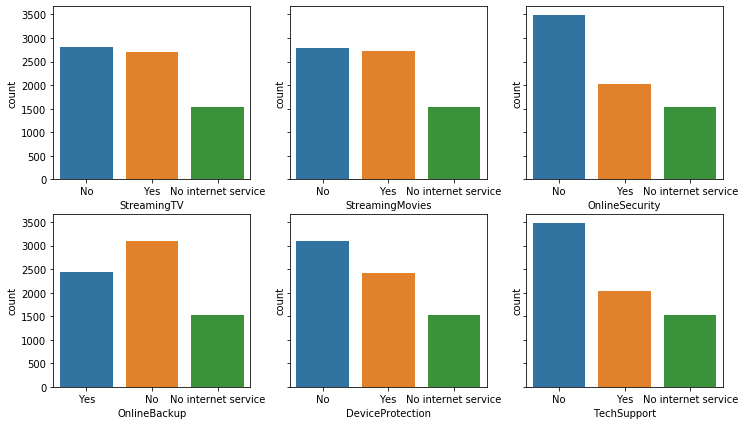

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sb.countplot("StreamingTV", data=df, ax=axes[0,0])
sb.countplot("StreamingMovies", data=df, ax=axes[0,1])
sb.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sb.countplot("OnlineBackup", data=df, ax=axes[1,0])
sb.countplot("DeviceProtection", data=df, ax=axes[1,1])
sb.countplot("TechSupport", data=df, ax=axes[1,2])

###### All internet service related features seem to have different churn rates for their classes because churn rate changes according to customers having these services.

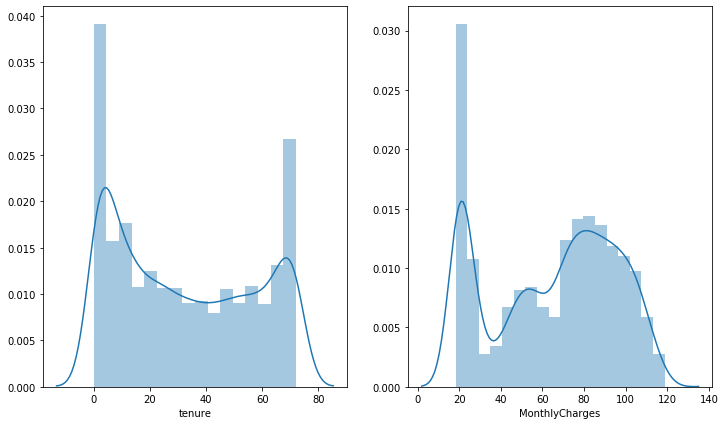

In [15]:
#Distribution of continuous features
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sb.distplot(df["tenure"], ax=axes[0])
sb.distplot(df["MonthlyCharges"], ax=axes[1])

###### According to the distribution of tenure variable, most of the customers are either new or have stayed for a long time with the company. Our goal should be finding a way to keep those customers with a tenure of up to a few months.A similar trend is seen on MonthlyCharges. There seems to be a gap between low rates and high rates.

# KaplanMeier curve

In [16]:
from lifelines import KaplanMeierFitter ## Import the library

durations = df['tenure'] ## Time to event data of censored and event data
event_observed = df['Churn']  ## It has the churned (1) and censored is (0)

### Fitting the curve Without breaking it into groups

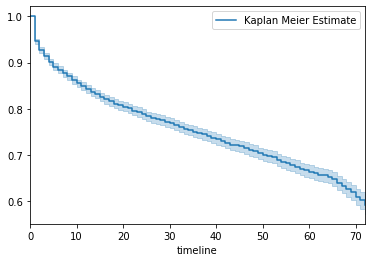

In [17]:
km = KaplanMeierFitter() ## create a kmf object as km, instantiate the class to create an object

km.fit(durations, event_observed,label='Kaplan Meier Estimate') ## Fit the data into the model

km.plot() ## Create an estimate

In [18]:
km.event_table
#Removed = Observed + Censored
#Censored = Person that didnt die/unknown status till completion of time period for this dataset
#Observed = Persons that died

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,11,0,11,7043,7043
1,613,380,233,0,7032
2,238,123,115,0,6419
3,200,94,106,0,6181
4,176,83,93,0,5981
5,133,64,69,0,5805
6,110,40,70,0,5672
7,131,51,80,0,5562
8,123,42,81,0,5431


In [19]:
km.predict([0,5,11,12]) #Finding survival probability for an array of the timeline

0     1.000000
5     0.891111
11    0.849691
12    0.843200
Name: Kaplan Meier Estimate, dtype: float64

### Creating Kaplan Meier Curves for different Cohorts

###### For 'Contract' Cohort

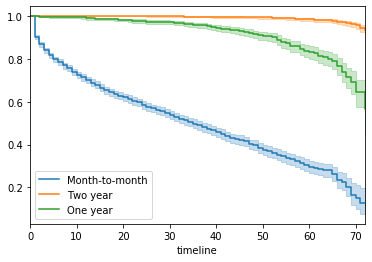

In [20]:
kmf = KaplanMeierFitter() 


T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored


groups = df['Contract']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Month-to-month')   ## Cohort 1
ix2 = (groups == 'Two year')         ## Cohort 2
ix3 = (groups == 'One year')         ## Cohort 3


kmf.fit(T[ix1], E[ix1], label='Month-to-month')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='Two year')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


kmf.fit(T[ix3], E[ix3], label='One year')        ## fit the cohort 3 data
kmf.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axis

###### For 'Streaming TV' Cohort

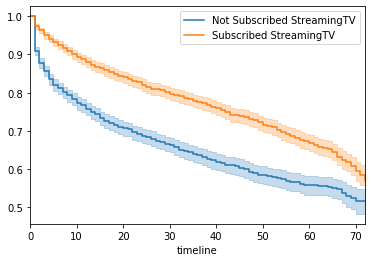

In [21]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## Two Cohorts are compared. 1. Streaming TV Not Subsribed by Users, 2. Streaming TV subscribed by the users.
groups = df['StreamingTV']   
i1 = (groups == 'No')      ## group i1 , having the pandas series for the 1st cohort
i2 = (groups == 'Yes')     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Not Subscribed StreamingTV')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Subscribed StreamingTV')
kmf1.plot(ax=a1)

# Cox Proportional Hazard Model-Survival Regression

In [22]:
from lifelines import CoxPHFitter

In [23]:
## Only using the subset of the columns present in the original data
df_r= df.loc[:,['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
df_r.head()

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [24]:
## Creating dummy variables for categorical to convert into numeric
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


In [25]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Applying the model
cph.fit(df_dummy , 'tenure', event_col='Churn')   ## Fit the data to model
cph.print_summary()    ## To see summary

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15182.39
         time fit was run = 2021-08-21 04:43:17 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
MonthlyCharges                   -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
SeniorCitizen                     0.40       1.49       0.06             0.29             0.50                 1.33                 1.66
gender_Male                      -0.01       0.99       0.05            -0.10             0.08                 0.90                 1.08
Partner_Yes                      -0.81       0.45       0.05            -0.92            -0.70                 0.40                 0.50
Dependents_Yes                   -0.36       0.70       0.07            -0.49            -0.22                 0.61                 0.80
PhoneService_Yes                  0.69       2.00       0.10             0.49             0.90                 1.63                 2.45
StreamingTV_No internet service  -2.10       0.12       0.13            -2.36            -1.84                 0.09                 0.16
StreamingTV_Yes                  -0.19       0.83       0.06            -0.31            -0.07                 0.73                 0.93

                                     z      p   -log2(p)
covariate                                               
MonthlyCharges                   -6.13 <0.005      30.06
SeniorCitizen                     7.16 <0.005      40.15
gender_Male                      -0.23   0.82       0.29
Partner_Yes                     -14.93 <0.005     164.98
Dependents_Yes                   -5.21 <0.005      22.37
PhoneService_Yes                  6.65 <0.005      34.96
StreamingTV_No internet service -15.79 <0.005     184.09
StreamingTV_Yes                  -3.10 <0.005       9.03
---
Concordance = 0.71
Partial AIC = 30380.78
log-likelihood ratio test = 941.30 on 8 df
-log2(p) of ll-ratio test = 654.95

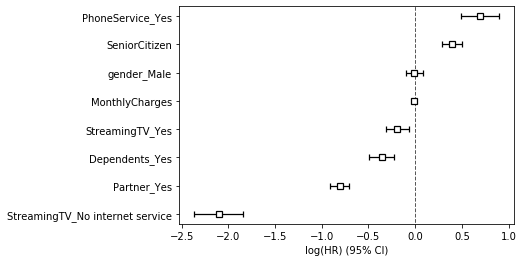

In [26]:
cph.plot()

# Estimating hazard rates using Nelson-Aalen

In [27]:
from lifelines import NelsonAalenFitter

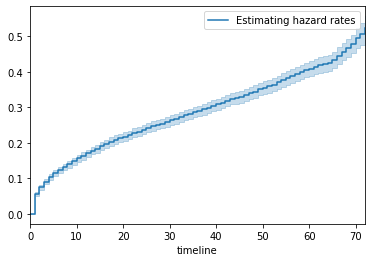

In [28]:
naf = NelsonAalenFitter()
naf.fit(durations, event_observed,label='Estimating hazard rates')
naf.plot()

In [29]:
naf.predict([0,22,32,52,72]) #To predict the hazard probability at different points in time

0     0.000000
22    0.228183
32    0.273478
52    0.363158
72    0.522775
Name: Estimating hazard rates, dtype: float64